In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
""" Problem 1 """

people = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
s1 = pd.Series(people)

val = -3
n = 5
s2 = pd.Series(val, index = 2 * (np.arange(n) +1))

print(s1)
print(s2)

Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64
2    -3
4    -3
6    -3
8    -3
10   -3
dtype: int64


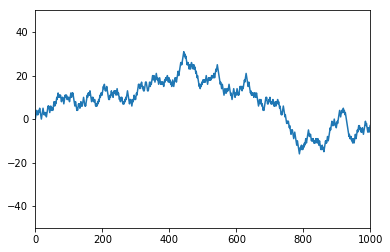

In [12]:
""" Problem 2 """
N = 1000
s = np.zeros(N)
s[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1 #coin flips
s = pd.Series(s)
s = s.cumsum()  # random walk
s.plot()
plt.ylim([-50, 50])
plt.show()
plt.close()

In [ ]:
""" Problem 3 """

In [ ]:
""" Problem 4 """

In [ ]:
""" Problem 5 """